In [1]:
# Import the required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans

### Step 1: Read in  the `option_trades.csv` file and create a DataFrame. Use the “date” column to create the DateTime Index. Be sure to include parameters for `parse_dates` and `infer_datetime_format`. 

In [2]:
# Read the CSV file into a Pandas DataFrame
# Use the date column to create the DateTime Index
df_options = pd.read_csv("https://static.bc-edx.com/mbc/ai/m2/datasets/option-trades.csv", 
                         index_col="date", 
                         parse_dates=True, 
                         infer_datetime_format=True
                        )

# Review the DataFrame
df_options.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
date,,,,,,,,,,,,,,,,,,,,,
2020-08-04 08:30:00,195.631965,210.025058,202.829513,221.569809,215.823048,212.112938,197.524908,214.564618,207.460115,209.855990,...,212.817158,201.262083,213.933774,206.132907,219.661568,204.972118,199.161883,194.000531,201.362749,205.688881
2020-08-04 11:00:00,218.833616,193.663638,182.807302,213.005657,194.657965,216.787274,201.662100,215.953316,201.586270,204.233793,...,218.560756,203.906526,196.645644,189.943663,196.537013,215.602311,217.919553,195.033360,202.346823,209.713289
2020-08-04 15:00:00,222.549239,200.632362,204.053803,198.749230,193.896719,201.005404,199.516591,209.182859,205.425138,197.457472,...,202.110909,219.896820,189.815097,198.069253,184.975622,198.668261,189.010191,204.879033,185.872788,196.961774
2020-08-05 08:30:00,177.901221,167.170212,178.674226,180.081992,197.030368,182.861254,182.138259,163.847409,175.976501,170.643134,...,173.560308,165.625163,177.090720,193.282793,187.996491,172.252274,183.706807,191.109464,179.242510,181.603642
2020-08-05 11:00:00,180.847294,186.696453,184.825757,180.116009,190.997511,177.779359,180.832512,173.574245,174.426271,148.636061,...,185.786780,171.388340,169.806288,168.503200,198.223226,183.767643,183.771038,203.553074,187.438263,155.905713


### Step 2: Create two lists: one for the range of lowercase-k values (from 1 to 11) to analyze and another to hold the list of inertia scores.

In [3]:
# Create a list for the range of k's to analyze in the elbow plot
# The range should be 1 to 11. 
k = list(range(1, 11))

In [4]:
# Create an empty list to hold inertia scores
inertia = []

### Step 3: For each instance of k, define and fit a K-means model, and append the model’s inertia to the empty inertia list that you created in Step 2.

In [5]:
# For each k, define and fit a K-means model and append its inertia to the above list
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    model.fit(df_options)
    inertia.append(model.inertia_)
    
# View the inertia list
inertia

[10804651.95737489,
 3367798.734774582,
 1660546.9227245785,
 1247312.1570758787,
 935906.6738774017,
 869521.614591255,
 784817.4155094068,
 701355.5914609156,
 625262.9863095116,
 578651.2374997162]

### Step 4: Store the values for lowercase-k and the inertia lists in a DataFrame called `df_elbow_data`.

In [6]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}


In [7]:
# Create a DataFrame from the dictionary holding the values for k and inertia.
df_elbow_data = pd.DataFrame(elbow_data)

### Step 5:  Using Pandas plot, plot the `df_elbow_data` DataFrame to visualize the elbow curve. Be sure to style and format your plot.

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

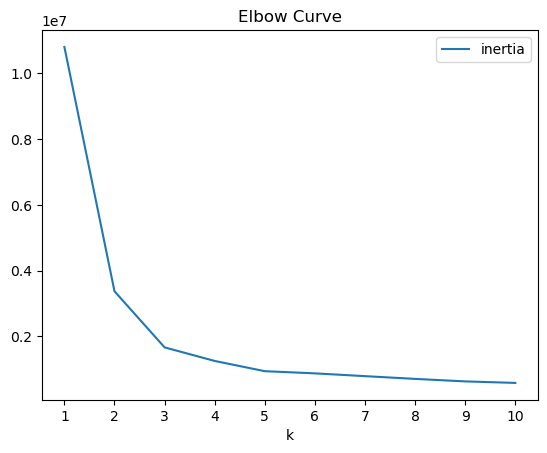

In [8]:
# Plot the elbow curve using hvPlot.
df_elbow_data.plot.line(
    x="k", 
    y= "inertia", 
    title="Elbow Curve", 
    xticks=k
)

### Step 6: Answer the following question:

**Question** Considering the plot, what’s the best number of clusters to choose, or value of k?

**Answer** Based on the plot, 3 seems to be the optimal number for k's value. 